
<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [16]:
!pip install pandas
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 84.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.0 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [19]:
import pandas as pd
import numpy as np

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [118]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [119]:
## Write your code here
duplicates = df[df.duplicated(keep=False)]
duplicate_counts = df.duplicated().sum()
print(f"\nTotal number of duplicate rows: {duplicate_counts}")
print("First few duplicate rows:")
print(duplicates.head())


Total number of duplicate rows: 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAs

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [120]:
## Write your code here

df_clean = df.drop_duplicates()
print(f"Row count from initial loaded dataframe {df.shape} \nRow count after removing duplicates{df_clean.shape}")
#print(df['EdLevel'].value_counts(dropna=False))
print(df.groupby('EdLevel', dropna=False).size())

Row count from initial loaded dataframe (65437, 114) 
Row count after removing duplicates(65437, 114)
EdLevel
Associate degree (A.A., A.S., etc.)                                                    1793
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Primary/elementary school                                                              1146
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Some college/university study without earning a degree                                 7651
Something else                                                                          932
NaN                                                                                    4653
dtype: int64


In [121]:
df[(df['ResponseId']<=10)].head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [124]:
df['ConvertedCompYearly'].max()

np.float64(16256603.0)

In [125]:
## Write your code here
print(df.isnull().sum().sort_values(ascending=False))
sorted_missing_percentage=((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
#sorted_missing_percentage[sorted_missing_percentage > 75]
columns_to_remove = sorted_missing_percentage[sorted_missing_percentage > 90].index
df_cleaned = df.drop(columns=columns_to_remove)
print(f"EdLevel before cleaning data : {df['EdLevel'].isnull().sum()}")
#df_cleaned_filled = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.mean())).reset_index(drop=True)
print(f"EdLvel after cleaning data : {df['EdLevel'].isnull().sum()}")

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Age                               0
Employment                        0
Check                             0
ResponseId                        0
Length: 114, dtype: int64
EdLevel before cleaning data : 4653
EdLvel after cleaning data : 0


In [127]:
df['EdLevel'].value_counts(dropna=False)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29595
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [128]:
df[(df['ResponseId']==1)].head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [132]:
df['ConvertedCompYearly'].value_counts()
df['ConvertedCompYearly'].max()

np.float64(16256603.0)

In [133]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Display outliers
print(outliers[['ConvertedCompYearly']])

       ConvertedCompYearly
72                  7322.0
374                30074.0
379                91295.0
385                53703.0
389               110000.0
...                    ...
41180              44640.0
41184             170000.0
41185             116844.0
41186              12000.0
41187             222834.0

[23435 rows x 1 columns]


In [134]:
# Calculate mean and standard deviation
mean = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()

# Calculate Z-scores
df['Z-score'] = (df['ConvertedCompYearly'] - mean) / std

# Identify outliers (Z-score > 3 or < -3)
outliers = df[df['Z-score'].abs() > 3]

# Display outliers
print(outliers[['ConvertedCompYearly', 'Z-score']])

       ConvertedCompYearly   Z-score
529               650000.0  5.045078
594               432000.0  3.094493
828              1000000.0  8.176750
920               500000.0  3.702932
1081              500000.0  3.702932
...                    ...       ...
40188             429429.0  3.071488
40288             438767.0  3.155041
40373             644437.0  4.995302
40952             750000.0  5.939841
41027             700000.0  5.492459

[193 rows x 2 columns]


In [75]:
# ---- 1. Min-Max Normalization (Scaling between 0 and 1) ----
df['Comp_MinMax'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

# ---- 2. Z-score Normalization (Standardization) ----
df['Comp_ZScore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# ---- 3. Log Transformation ----
df['Comp_Log'] = np.log(df['ConvertedCompYearly'] + 1)

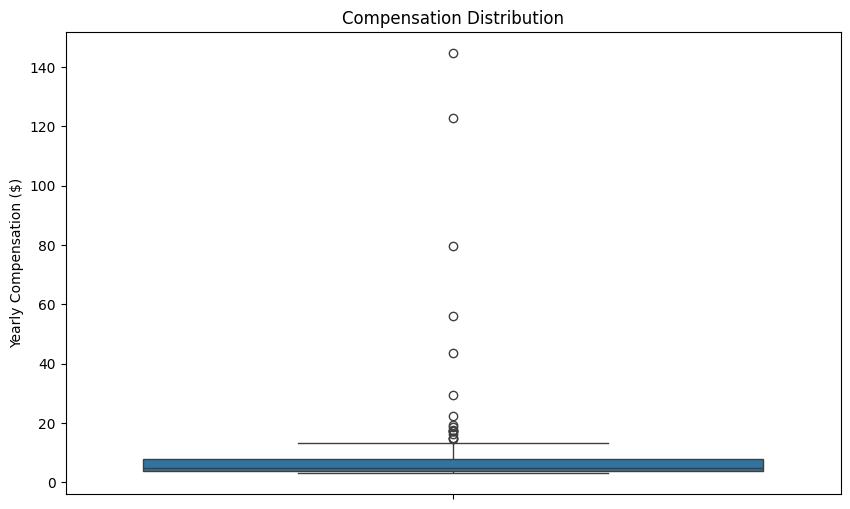

In [144]:
from IPython.display import HTML, display
import seaborn as sns
import matplotlib.pyplot as plt
def analyze_compensation(df):
    # Display initial compensation statistics
    display(HTML(f"""
    <h3 style='color: #2196F3'>Compensation Analysis:</h3>
    <ul>
        <li>Total Records: <b>{len(df)}</b></li>
        <li>Missing Values: <b>{outliers['ConvertedCompYearly'].isna().sum()}</b></li>
        <li>Current Range: <b>${outliers['ConvertedCompYearly'].min():,.2f} - ${df['ConvertedCompYearly'].max():,.2f}</b></li>
        <li>Median Compensation: <b>${outliers['ConvertedCompYearly'].median():,.2f}</b></li>
        <li>Z-score Max Compensation: <b>${outliers['Z-score'].max()}</b></li>
        <li>Z-score Min Compensation: <b>${outliers['Z-score'].min()}</b></li>
        <li>Z-score Median Compensation: <b>${outliers['Z-score'].median()}</b></li>
        <li>Z-score Mean Compensation: <b>${outliers['Z-score'].mean()}</b></li>
    </ul>
    """))

    # Handle missing values
    df_clean = outliers.copy()
    #median_comp = df_clean['ConvertedCompYearly'].median()
    #df_clean['ConvertedCompYearly'] = df_clean['ConvertedCompYearly'].fillna(median_comp)

    # Create visualization of compensation distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=outliers, y='Z-score')
    plt.title('Compensation Distribution')
    plt.ylabel('Yearly Compensation ($)')
    plt.show()

    return df_clean

# Execute the analysis
clean_df = analyze_compensation(outliers)

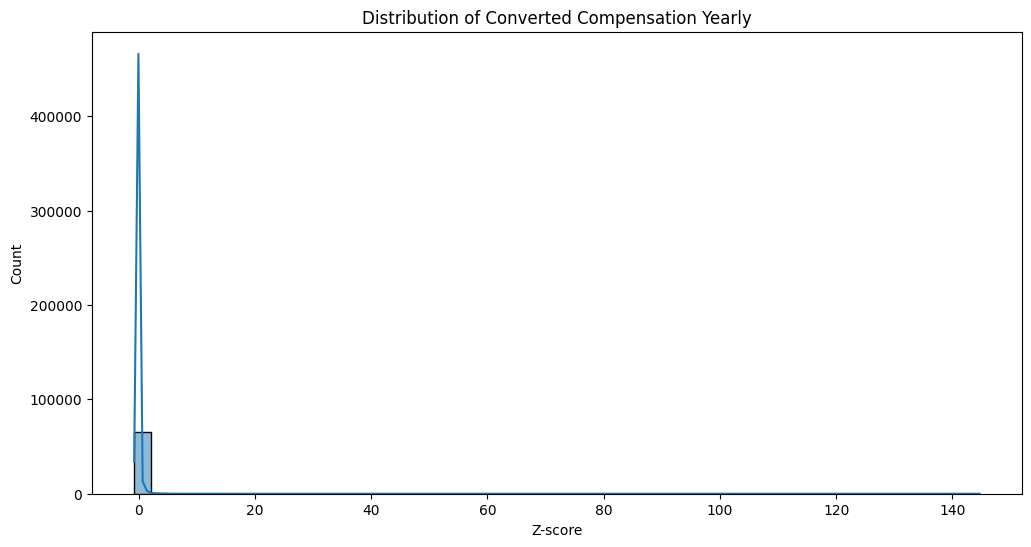

In [145]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Z-score'], kde=True, bins=50)
plt.title('Distribution of Converted Compensation Yearly')
plt.show()

In [188]:
df_clean = df[df['Z-score'].abs() <= 3]

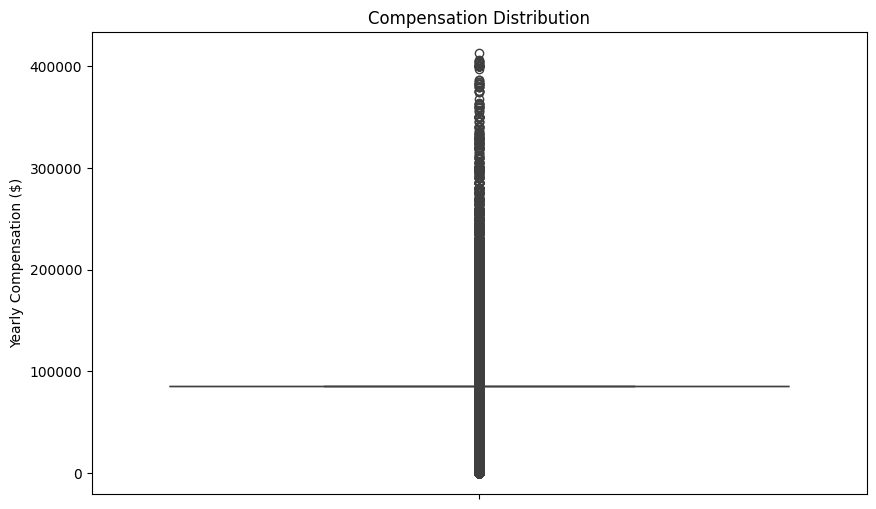

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, y='ConvertedCompYearly')
plt.title('Compensation Distribution')
plt.ylabel('Yearly Compensation ($)')
plt.show()

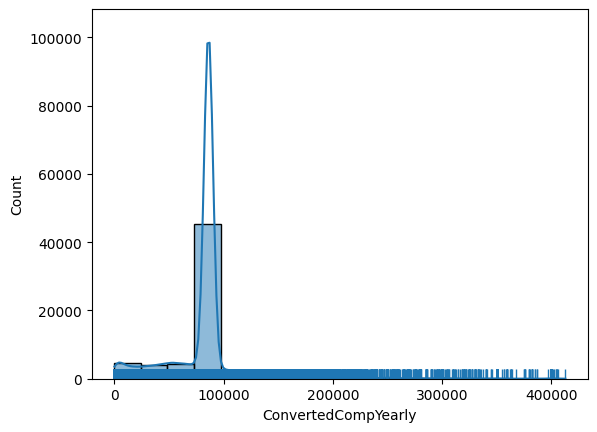

In [192]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_clean, x="ConvertedCompYearly",kde=True)
sns.rugplot(data=df_clean, x="ConvertedCompYearly")
plt.show()

In [195]:
from IPython.display import HTML, display
display(HTML(f"""
    <h3 style='color: #2196F3'>Compensation Analysis:</h3>
    <ul>
        <li>Total Records: <b>{len(df_clean)}</b></li>
        <li>Missing Values: <b>{df_clean['ConvertedCompYearly'].isna().sum()}</b></li>
        <li>Initial Range: <b>${df_clean['ConvertedCompYearly'].min():,.2f} # ${df['Z-score'].max():,.2f}</b></li>
    </ul>
    """))


#df_clean = df.copy()

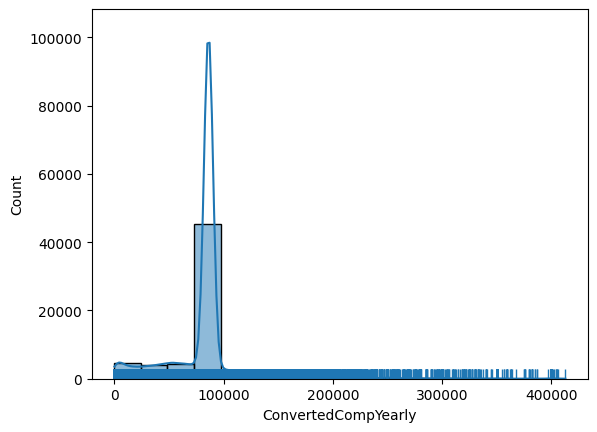

In [196]:
sns.histplot(data=df_clean, x="ConvertedCompYearly",kde=True)
sns.rugplot(data=df_clean, x="ConvertedCompYearly")
plt.show()

### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


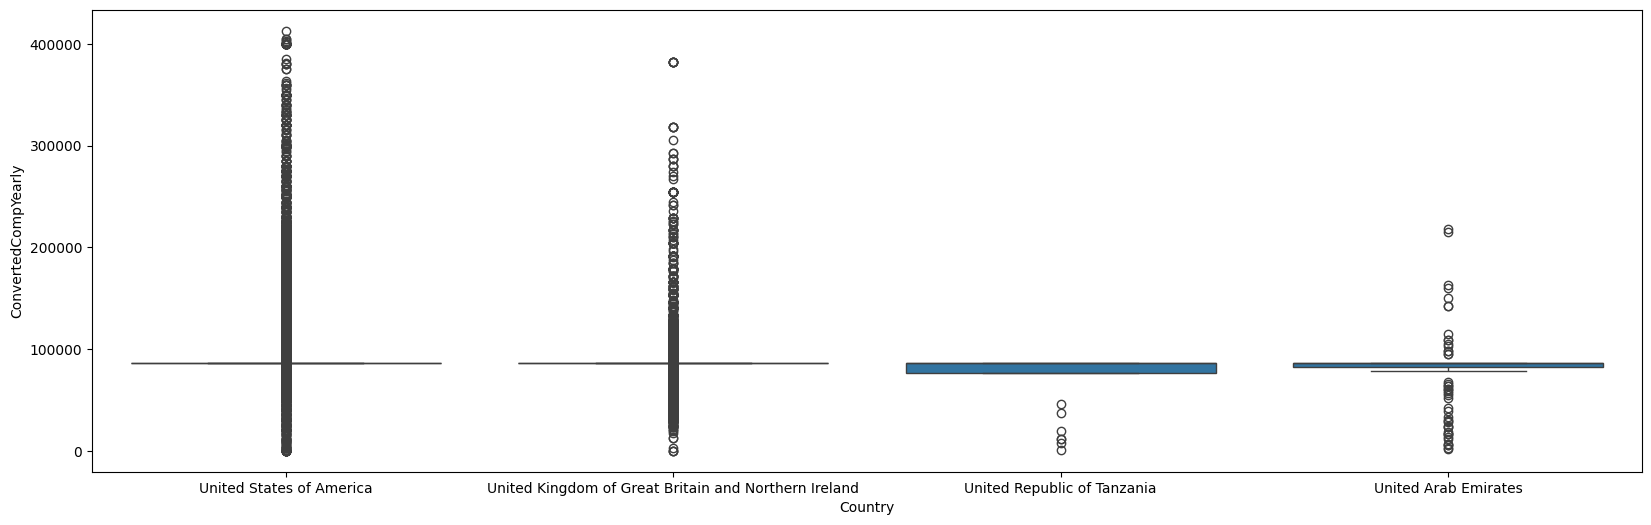

In [197]:
## Write your code here
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_clean[df_clean['Country'].str.contains('^United', case=False, na=False)], x="Country", y="ConvertedCompYearly")
plt.show()

In [198]:
# Step 1: Get the count of each unique value in the 'Employment' column, including NaN values
employment_counts = df_clean['Employment'].value_counts(dropna=False)

# Step 2: Filter values where count is greater than 2000
employment_values_gt_2000 = employment_counts[employment_counts > 2000].index

# Step 3: Filter the DataFrame for rows where the 'Employment' value is in the filtered values
df_clean_gt_2000 = df_clean[df_clean['Employment'].isin(employment_values_gt_2000)]

# Display the filtered DataFrame
print(df_clean_gt_2000)

       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

/tmp/ipykernel_87/186595409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment', data=df_clean_gt_2000, palette='Set2')


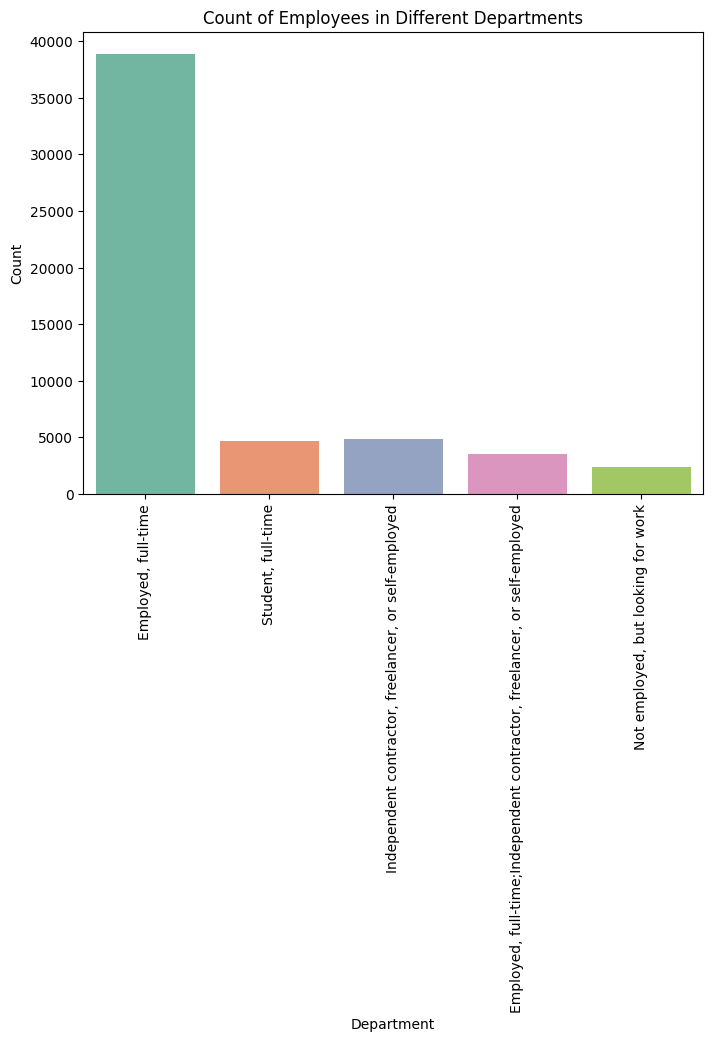

In [199]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment', data=df_clean_gt_2000, palette='Set2')
plt.title('Count of Employees in Different Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

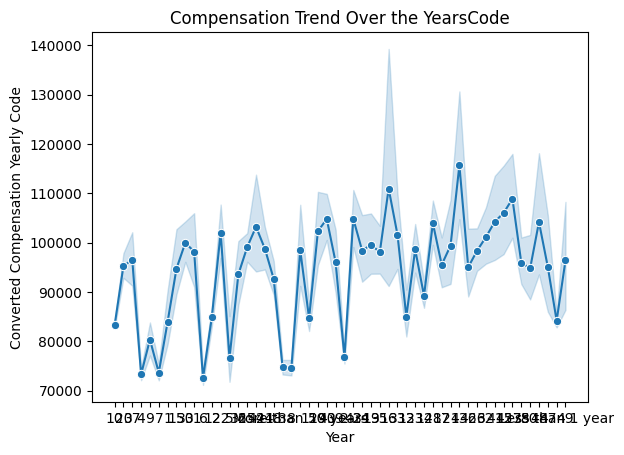

In [203]:
sns.lineplot(x='YearsCode', y='ConvertedCompYearly', data=df, marker='o')
plt.title('Compensation Trend Over the YearsCode')
plt.xlabel('Year')
plt.ylabel('Converted Compensation Yearly Code')
plt.show()

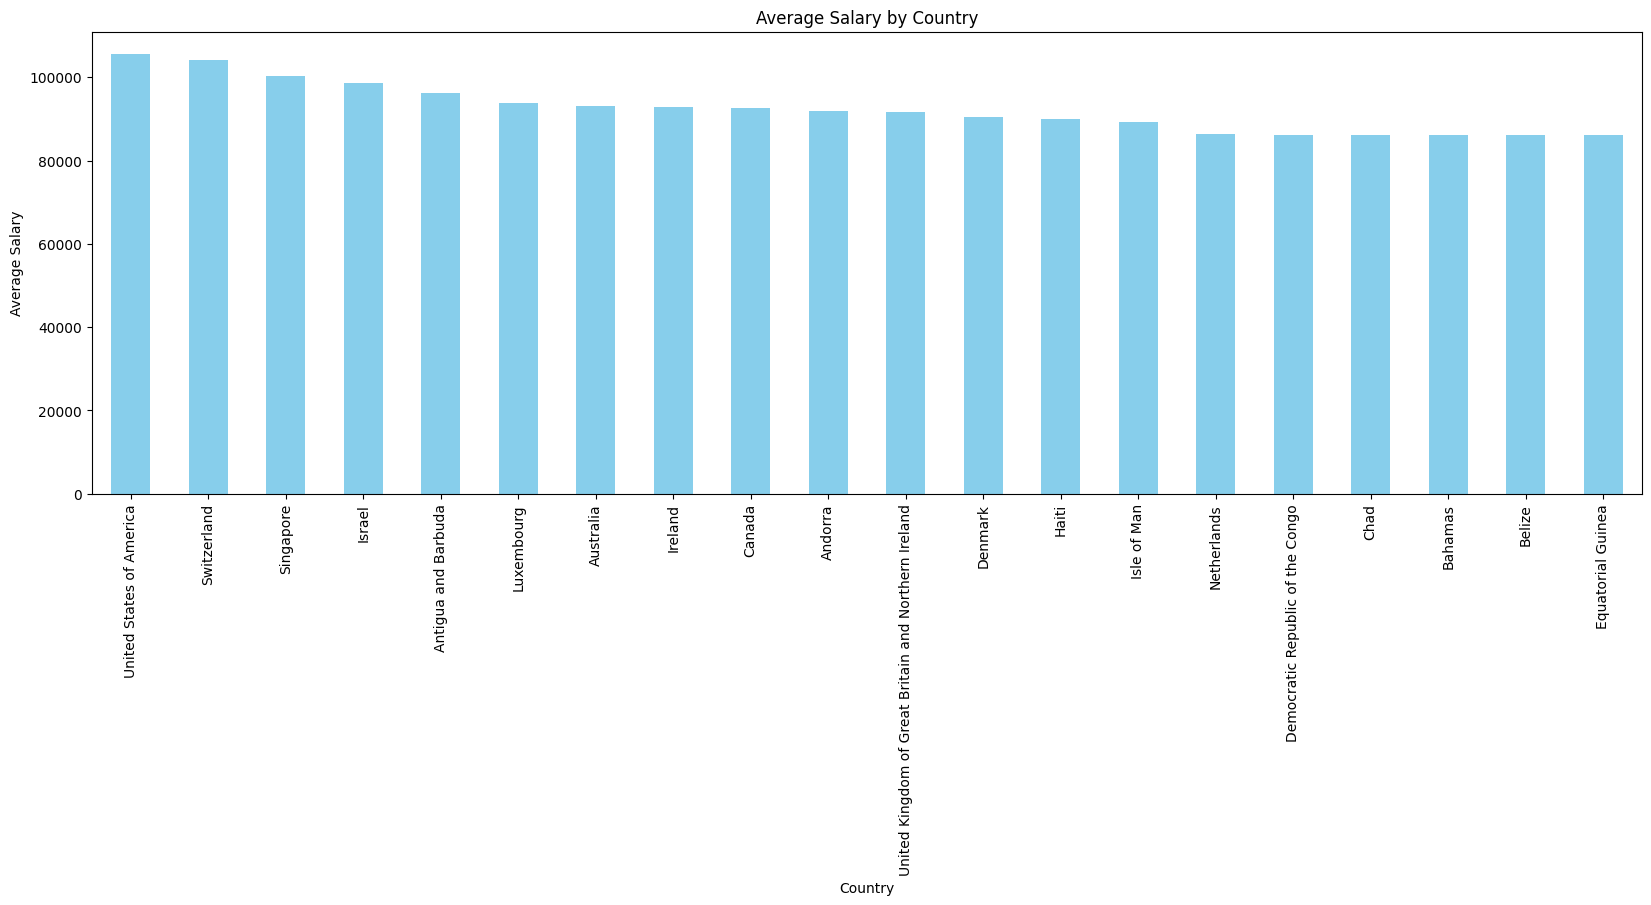

In [210]:
department_avg_salary = (df_clean_gt_2000.groupby('Country')['ConvertedCompYearly'].mean()).sort_values(ascending=False)
department_avg_salary.head(20).plot(kind='bar', figsize=(20, 6), color='skyblue')
plt.title('Top 20 Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()

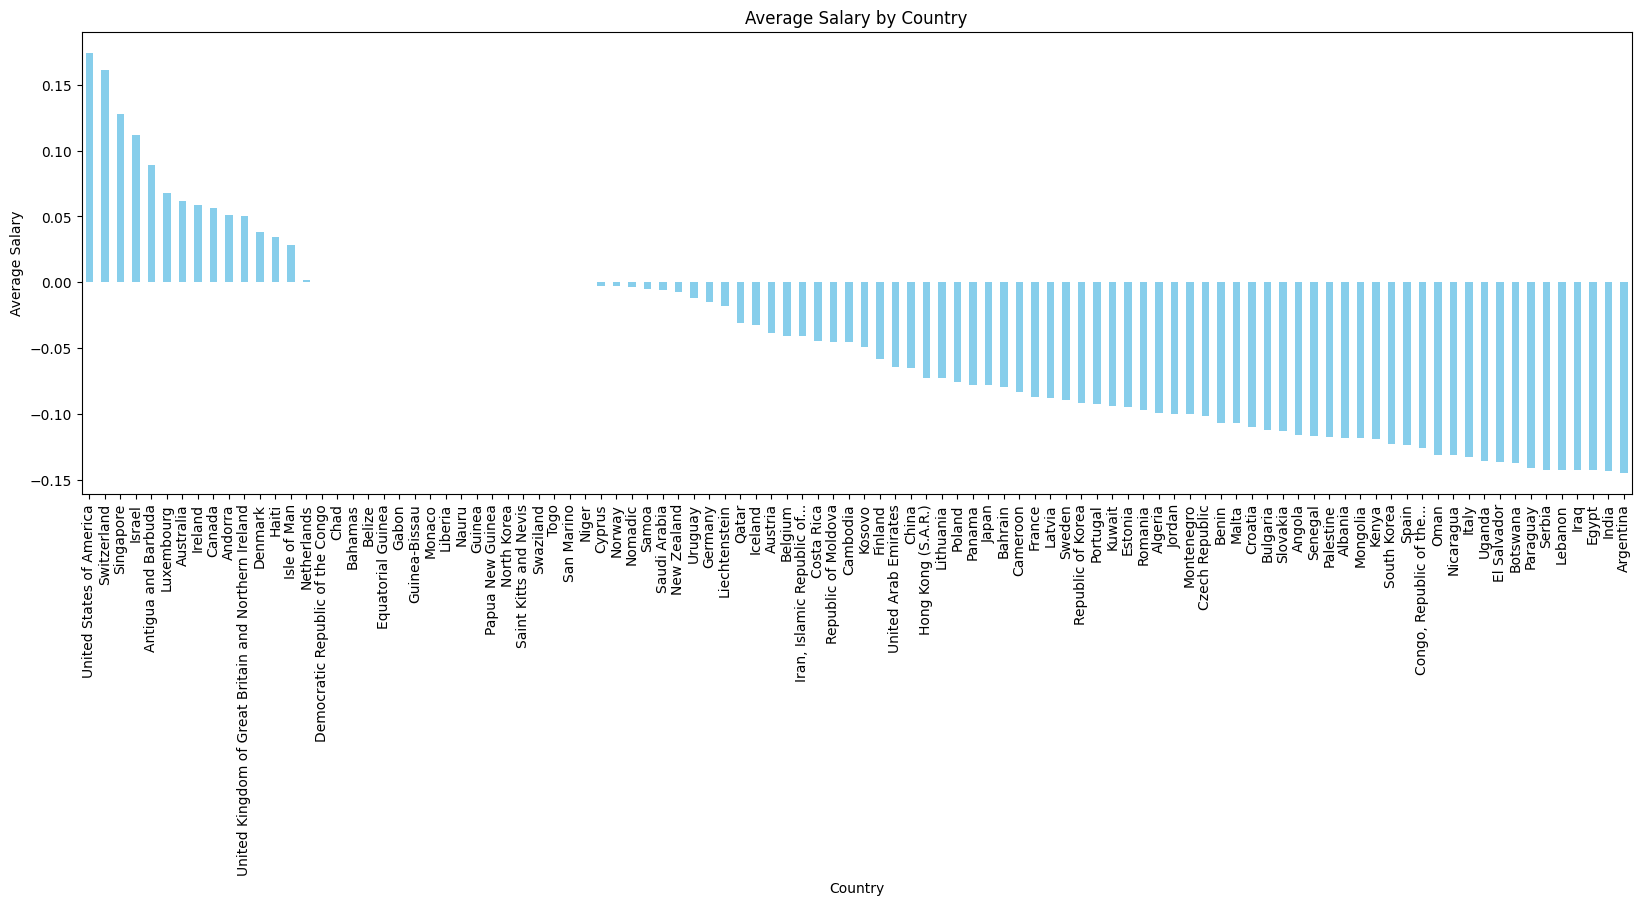

In [211]:
department_avg_salary = (df_clean_gt_2000.groupby('Country')['Z-score'].mean()).sort_values(ascending=False)
department_avg_salary.head(100).plot(kind='bar', figsize=(20, 6), color='skyblue')
plt.title('Average Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
